<a href="https://colab.research.google.com/github/spKrispy/Strata-genome/blob/main/Kmeans_Subset_OnlyCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import os
import glob2
import re
import progressbar
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
path= "/content/drive/MyDrive/Lung_Cancer_Processed_VCFs" #Importing all csv files of samples

In [4]:
files= glob2.glob(os.path.join(path, "*.tsv"))
# ce_files = []
# abs_files =[]

# for i in files:
#   if '-SE8-' in i or '-SSE-' in i or 'SSE' in i or 'SE8' in i or '-B-' in i:
#     abs_files.append(i)
#   else:
#     ce_files.append(i)



In [5]:
len(ce_files)
ce_files


NameError: name 'ce_files' is not defined

In [ ]:
pd.read_csv('/content/drive/MyDrive/Lung_Cancer_Processed_VCFs/IN-423-UFNA-F-SSE-S6_merged_output.tsv', sep='\t').shape

(99168, 54)

In [ ]:
Indigenes=pd.read_csv("/content/drive/MyDrive/IntOGen-DriverGenes_LUNG.tsv",header=None, sep='\t')
gene=Indigenes[0].tolist()
s=0
ce_files=files
my_df=[]
for i in progressbar.progressbar(range(len(ce_files))):
    sp1=re.split(r'/|\\',ce_files[i])[-1]
    col_n=sp1.split('_')[0]
    df=pd.read_csv(ce_files[i], sep='\t').drop_duplicates()
    filtered_df=df.loc[df['Ref.Gene'].isin(gene)]
    row_list=filtered_df['Ref.Gene'].tolist()

    #row_list = [item for item in row_list if '.' not in item]
    col_list=filtered_df['InterVar_automated'].tolist()
    new_df=pd.DataFrame(col_list,index=row_list,columns=[col_n])
    new_df=new_df.replace("Uncertain_significance","1")
    new_df=new_df.replace("Uncertain_significance","1")
    new_df=new_df.replace("Benign","2")
    new_df=new_df.replace("Likely_benign","3")
    new_df=new_df.replace("Likely_pathogenic","5")
    new_df=new_df.replace('Pathogenic',"6")
    new_df=new_df.replace('.','4')
    new_df=new_df.astype(int)
    mod_df = new_df.copy()
    mod_df[new_df > 4] = 2 # Pathogenic
    mod_df[(new_df <= 4) & (new_df > 0)] = 1 #Benign
    mod_df.fillna(0, inplace=True)
    mod_df = mod_df.groupby(mod_df.index.tolist(),axis=0)
    grouped_df=mod_df.max()
    my_df.append(grouped_df)

100% (207 of 207) |######################| Elapsed Time: 0:02:12 Time:  0:02:12


## Hits Matrix

In [14]:
Indigenes=pd.read_csv("/content/drive/MyDrive/IntOGen-DriverGenes_LUNG.tsv",header=None, sep='\t')
gene=Indigenes[0].tolist()
my_df=[]
ce_files=files


for i in progressbar.progressbar(range(len(ce_files))):
  df = pd.read_csv(ce_files[i], sep='\t').drop_duplicates()
  sp1=re.split(r'/|\\',ce_files[i])[-1]
  col_n=sp1.split('_')[0]
  df = df[df[f'{col_n}:DP']!='.']
  df[f'{col_n}:DP'] = df[f'{col_n}:DP'].astype('float')
  df = df[df[f'{col_n}:DP']>=10]
  df=df.loc[df['Ref.Gene'].isin(gene)]

  row_list=df['Ref.Gene'].tolist()
  col_list=df['InterVar_automated'].tolist()

  new_df=pd.DataFrame(col_list,index=row_list,columns=[col_n])
  new_df=new_df.replace("Uncertain_significance","1")
  new_df=new_df.replace("Uncertain_significance","1")
  new_df=new_df.replace("Benign","2")
  new_df=new_df.replace("Likely_benign","3")
  new_df=new_df.replace("Likely_pathogenic","5")
  new_df=new_df.replace('Pathogenic',"6")
  new_df=new_df.replace('.','4')
  new_df=new_df.astype(int)
  mod_df = new_df.copy()
  mod_df[new_df > 4] = 1 # Pathogenic
  mod_df[(new_df <= 4) & (new_df > 0)] = 1 #Benign
  mod_df.fillna(0, inplace=True)
  mod_df = mod_df.groupby(mod_df.index.tolist(),axis=0)
  grouped_df=mod_df.sum()
  my_df.append(grouped_df)

100% (206 of 206) |######################| Elapsed Time: 0:01:50 Time:  0:01:50


In [27]:
pd.read_csv('/content/drive/MyDrive/Lung_Cancer_Processed_VCFs/IN-423-UFNA-F-SSE-S6_merged_output.tsv', sep='\t').drop_duplicates(subset='IGV_link', keep='first')['avsnp150'].value_counts()

.              43734
rs6682375          1
rs2287016          1
rs175081           1
rs175499           1
               ...  
rs9349593          1
rs45451196         1
rs765525           1
rs761075492        1
rs10465459         1
Name: avsnp150, Length: 41964, dtype: int64

## Presence - Absence matrix

In [106]:
Indigenes=pd.read_csv("/content/drive/MyDrive/IntOGen-DriverGenes_LUNG.tsv",header=None, sep='\t')
gene=Indigenes[0].tolist()
my_df=[]
ce_files=files


for i in progressbar.progressbar(range(len(ce_files))):
  df = pd.read_csv(ce_files[i], sep='\t').drop_duplicates(subset='IGV_link', keep='first')
  sp1=re.split(r'/|\\',ce_files[i])[-1]
  col_n=sp1.split('_')[0]
  df = df[df[f'{col_n}:DP']!='.']
  df[f'{col_n}:DP'] = df[f'{col_n}:DP'].astype('float')
  df = df[df[f'{col_n}:DP']>=10]
  df=df.loc[df['Ref.Gene'].isin(gene)]
  df = df[~df['InterVar_automated'].str.contains('benign', case=False)]
  df = df[df['avsnp150']!='.']
  df['Mutations'] = df['avsnp150']+"_"+df['Ref.Gene']

  row_list=df['Mutations'].tolist()
  col_list=df['InterVar_automated'].tolist()

  new_df=pd.DataFrame(col_list,index=row_list,columns=[col_n])
  new_df=new_df.replace("Uncertain_significance","1")
  new_df=new_df.replace("Uncertain_significance","1")
  new_df=new_df.replace("Likely_pathogenic","5")
  new_df=new_df.replace('Pathogenic',"6")
  new_df=new_df.replace('.','4')
  new_df=new_df.astype(int)
  mod_df = new_df.copy()
  mod_df[new_df > 4] = 1 # Pathogenic
  mod_df[(new_df <= 4) & (new_df > 0)] = 1 #Benign
  mod_df.fillna(0, inplace=True)
  mod_df = mod_df.groupby(mod_df.index.tolist(),axis=0)
  grouped_df=mod_df.sum()
  my_df.append(grouped_df)

100% (206 of 206) |######################| Elapsed Time: 0:01:21 Time:  0:01:21


In [107]:
final_df=pd.concat(my_df,axis=1)
final_df=final_df.fillna(0).astype(int).T
# final_df['Pathogenic'] = final_df.apply(lambda row: row.value_counts().get(2, 0), axis=1)
final_df

,rs10052174_DROSHA,rs1061156_HLA-A,rs1061235_HLA-A,rs10915252_PTPRU,rs111820297_HLA-A,rs112500609_NSD1,rs113087899_BCR,rs113645195_HLA-A,rs11515_CDKN2A,rs117774166_SETD1B,...,rs779663214_FGFR3,rs533830556_ATM,rs187110786_RB1,rs780674112_NF1,rs886332295_PDGFRA,rs115849119_EP300,rs376541557_FAT3,rs548000491_NOTCH1,rs757778956_ZNF521,rs767630195_ALK
IN-423-UFNA-F-SSE-S6,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
UG1D-F-SE8-RSQ-Merged,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
UHMB-F-SE8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
UIXB-F-SE8-S9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
UJ1E-F-SE8-S12,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEBP-F-D-CE-S116,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
WCTE-F-D-CE-STD-S66,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
WCTE-F-D-CE-S64,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
WEEO-F-D-CE-S36,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(final_df)

In [108]:
u_feature =[]
for i in final_df.columns:

  if 0 in final_df[i].value_counts().to_dict().keys():
    if final_df[i].value_counts().to_dict()[0] > 160:
      u_feature.append(i)


In [110]:
final_df.drop(u_feature, axis=1, inplace=True)

In [111]:
len(final_df.columns)

150

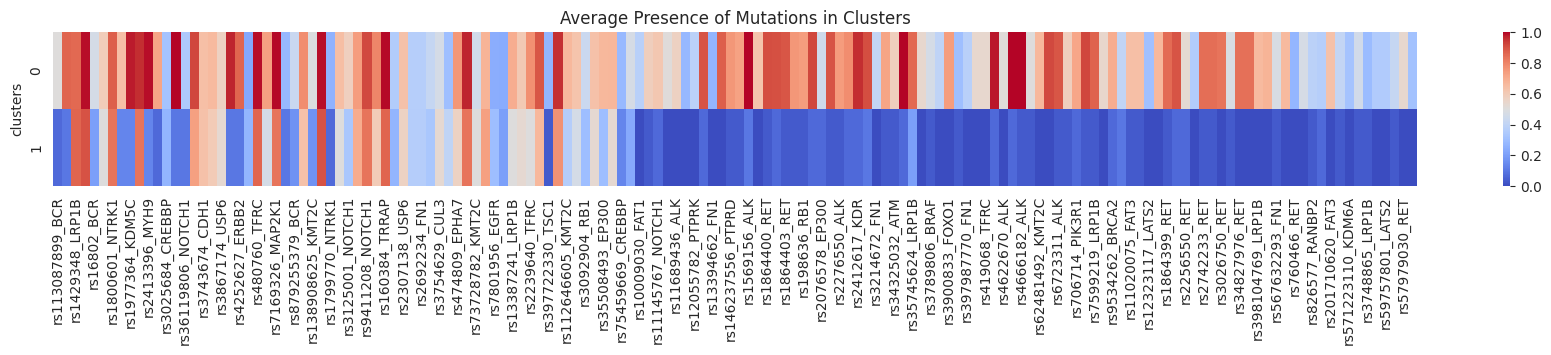

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_df' contains your data with 'clusters' column

# Calculate the average of all columns based on 'clusters'
avg_data = final_df.groupby('clusters').mean()

# Plotting using Seaborn heatmap
plt.figure(figsize=(22, 2))
sns.heatmap(avg_data, cmap='coolwarm')
plt.title('Average Presence of Mutations in Clusters')
plt.show()

In [112]:
import pandas as pd
import numpy as np
import os
import glob2
import re
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.spatial import ConvexHull
import warnings
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'axes.grid' : False})

In [91]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

## TSNE Dimentionality reduction

In [113]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = final_df.columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply min-max scaling to the selected columns
final_df = final_df.copy()  # Creating a copy to avoid modifying the original DataFrame
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

In [114]:
dim_red = TSNE(n_components=2, perplexity=20).fit_transform(final_df)
tsne_df=pd.DataFrame(dim_red)
tsne_df.columns = ['x', 'y']
len(tsne_df)

206

In [38]:

def plot_clusters(data, x_axis, y_axis, cluster_labels, title,method,mat):
    output_folder = 'New_OLD_Images'
    os.makedirs(output_folder, exist_ok=True)
    plt.figure(figsize=(5, 5))
    sns.color_palette("tab10")
    sns.scatterplot(data=data, x=x_axis, y=y_axis, hue=cluster_labels, style=cluster_labels, palette='tab10')
    plt.legend(loc="upper right")
    plt.title(title)
    plt.grid(False)
    plt.savefig(os.path.join(output_folder, f'{title}_{method}_{mat}.png'), format='png', transparent=True)
    plt.show()

In [133]:
kmeans = KMeans(n_clusters=5).fit(dim_red)
labels = kmeans.labels_
tsne_df['cluster'] = labels
tsne_df.index = final_df.index.tolist()
x_axis = np.array(tsne_df['x'])
y_axis = np.array(tsne_df['y'])
#plot_clusters(tsne_df, x_axis, y_axis, tsne_df['cluster'], 'Lung Cancer' +" Clusters",'tsne','matrix')

In [122]:
final_df['clusters'] = tsne_df['cluster']

In [118]:
tsne_df.to_csv("tsne_clusters.csv")

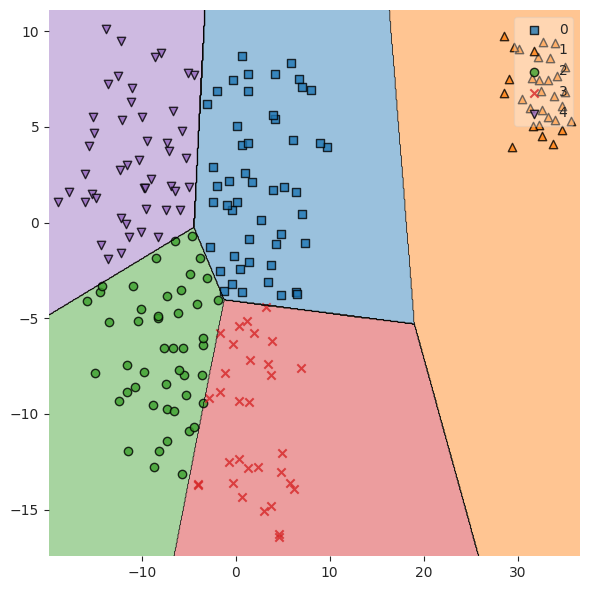

In [134]:

from mlxtend.plotting import plot_decision_regions
# Plot decision boundaries
plt.figure(figsize=(6, 6))
plot_decision_regions(dim_red,labels, clf=kmeans)
plt.tight_layout()
plt.show()

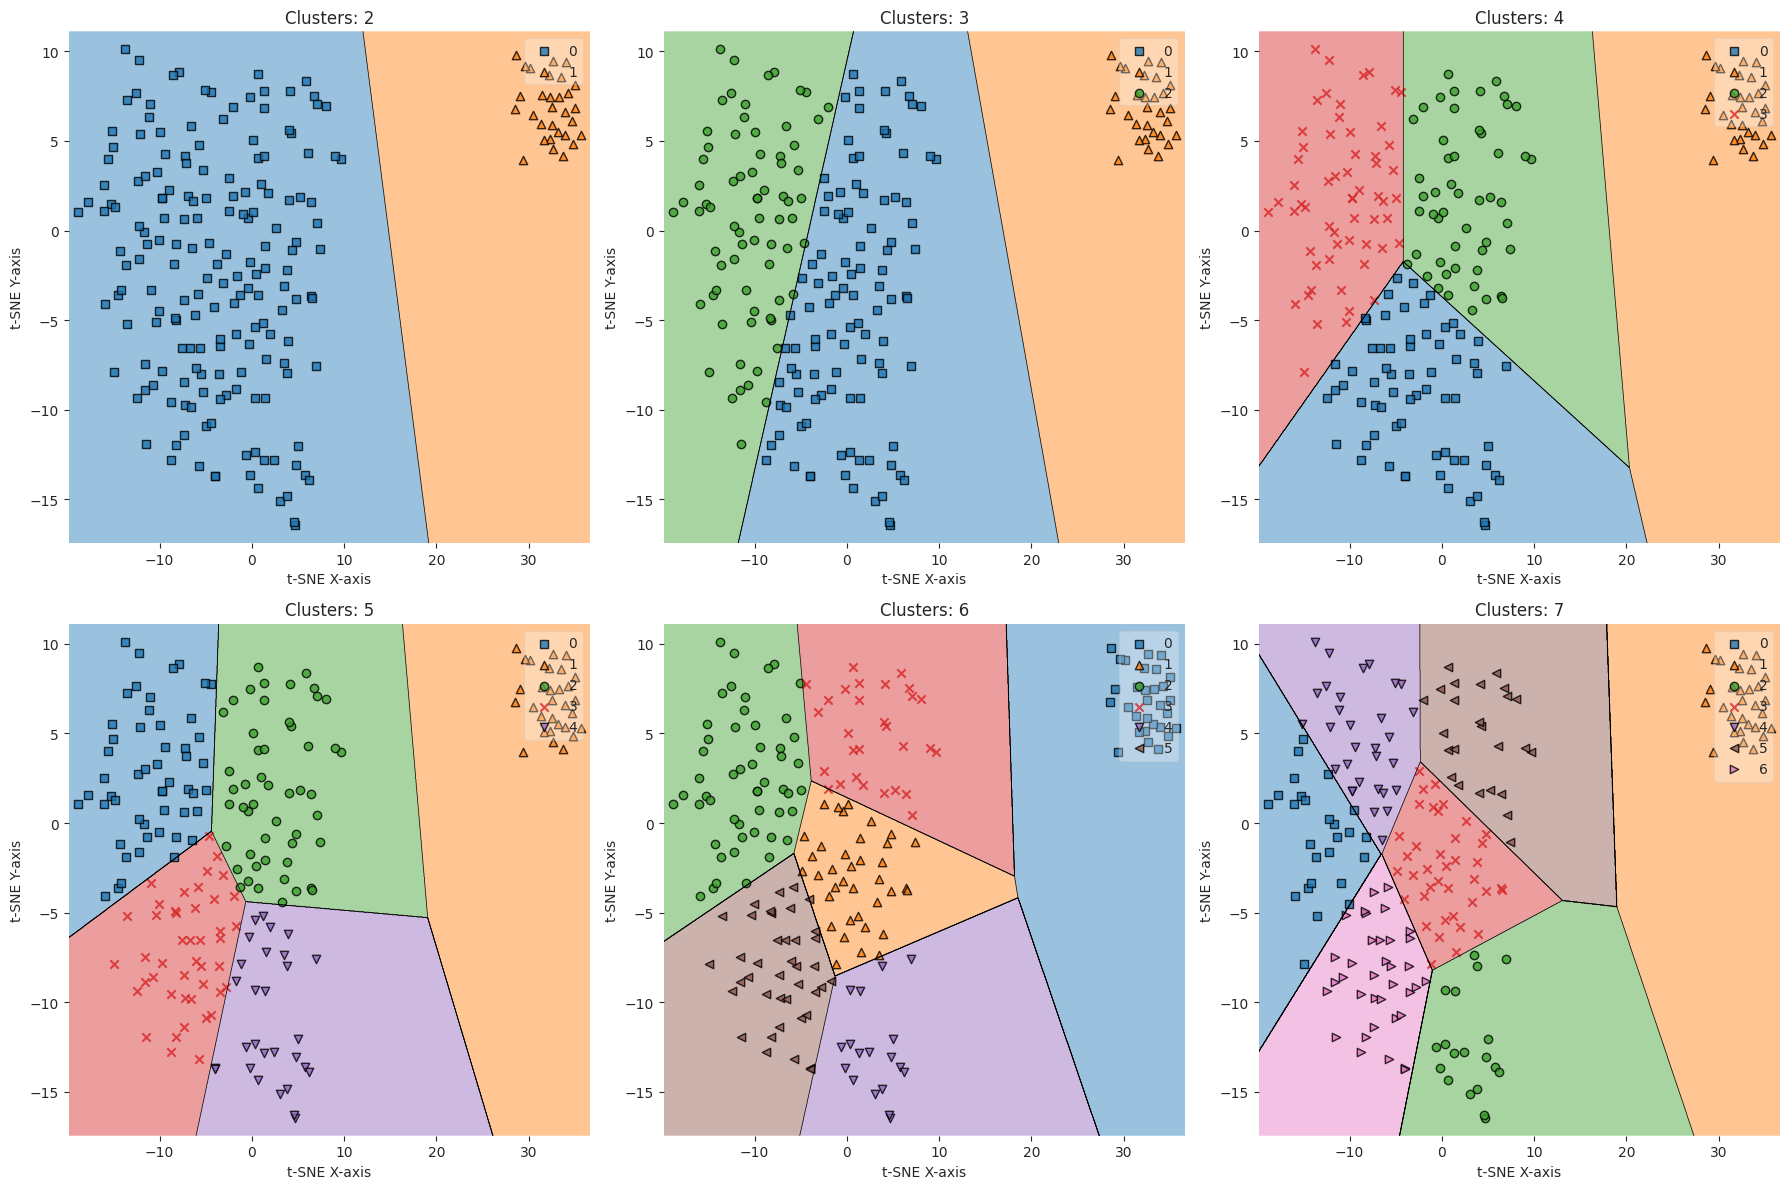

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions

# Assuming 'dim_red', 'tsne_df', and 'final_df' are appropriately defined

# Define the range of clusters
cluster_range = range(2, 8)

# Create subplots for each number of clusters
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, n_clusters in enumerate(cluster_range):
    kmeans = KMeans(n_clusters=n_clusters).fit(dim_red)
    labels = kmeans.labels_
    tsne_df['cluster'] = labels
    tsne_df.index = final_df.index.tolist()
    x_axis = np.array(tsne_df['x'])
    y_axis = np.array(tsne_df['y'])

    # Plot t-SNE clusters with decision boundaries for each number of clusters
    ax = axs[i // 3, i % 3]
    plot_decision_regions(dim_red, labels, clf=kmeans, ax=ax)
    ax.set_title(f'Clusters: {n_clusters}')
    ax.set_xlabel('t-SNE X-axis')
    ax.set_ylabel('t-SNE Y-axis')

plt.tight_layout()
plt.show()

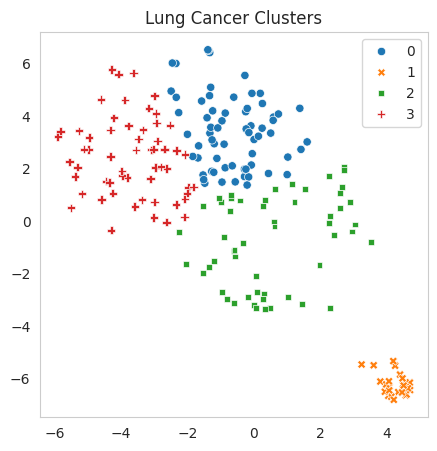

In [55]:
kmeans = KMeans(n_clusters=4).fit(dim_red)
labels = kmeans.labels_
tsne_df['cluster'] = labels
tsne_df.index = final_df.index.tolist()
x_axis = np.array(tsne_df['x'])
y_axis = np.array(tsne_df['y'])
plot_clusters(tsne_df, x_axis, y_axis, tsne_df['cluster'], 'Lung Cancer ' +"Clusters",'tsne','matrix')

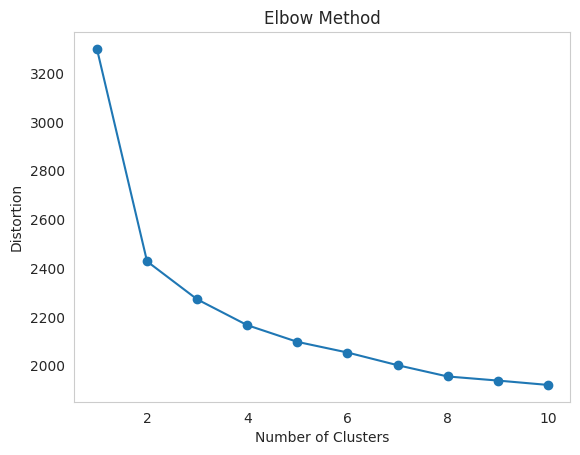

In [56]:
# Elbow method
def plot_elbow_method(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_elbow_method(final_df)

In [ ]:
# Silhouette score
def calculate_silhouette_score(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    return silhouette_avg

# Davies-Bouldin Index
def calculate_davies_bouldin_index(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    davies_bouldin = davies_bouldin_score(data, cluster_labels)
    return davies_bouldin

# Calinski-Harabasz Index
def calculate_calinski_harabasz_index(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    calinski_harabasz = calinski_harabasz_score(data, cluster_labels)
    return calinski_harabasz

def plot_eval_scores(eval_method,data, fun, cluster_range, fun2):
    x = list(range(cluster_range[0], cluster_range[1] + 1))
    y = [fun(data, i) for i in range(cluster_range[0], cluster_range[1] + 1)]

    plt.plot(x, y)
    plt.title(f'{eval_method} Score : {fun2(y)}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.show()



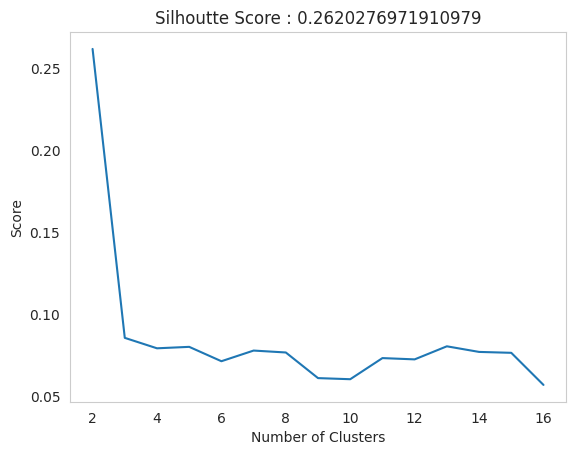

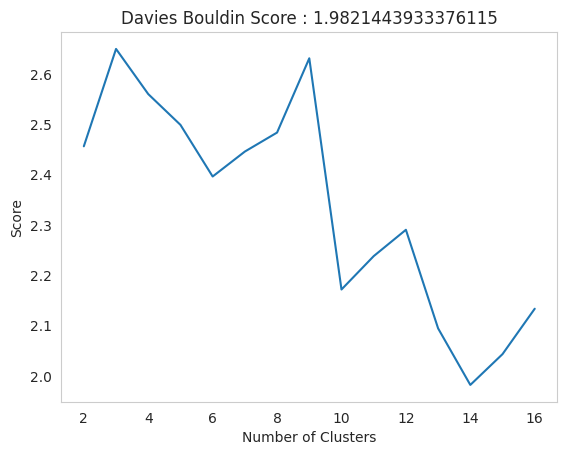

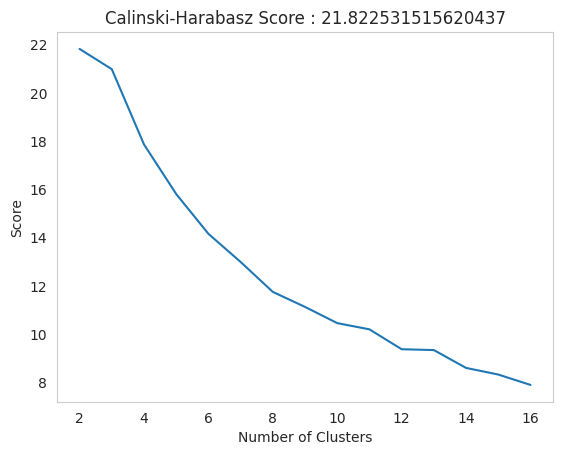

In [ ]:
plot_eval_scores('Silhoutte',final_df, calculate_silhouette_score, (2, 16), max)
plot_eval_scores('Davies Bouldin', final_df, calculate_davies_bouldin_index, (2,16), min)
plot_eval_scores('Calinski-Harabasz', final_df, calculate_calinski_harabasz_index, (2,16), max)

## PCA Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
dim_red_pca = pca.fit_transform(final_df)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(dim_red_pca, columns=['PC1', 'PC2'])
len(pca_df)

207

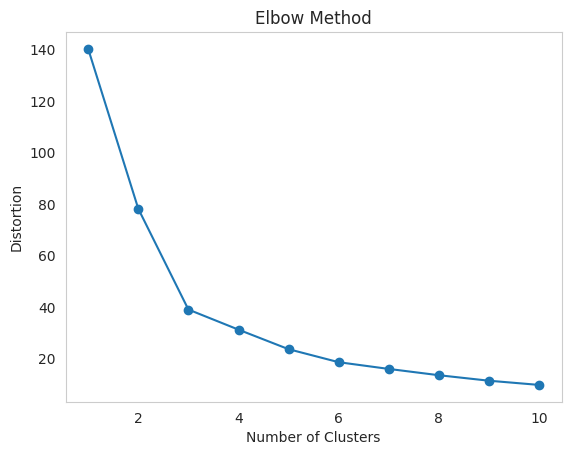

In [ ]:
# Elbow method
def plot_elbow_method(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_elbow_method(dim_red_pca)

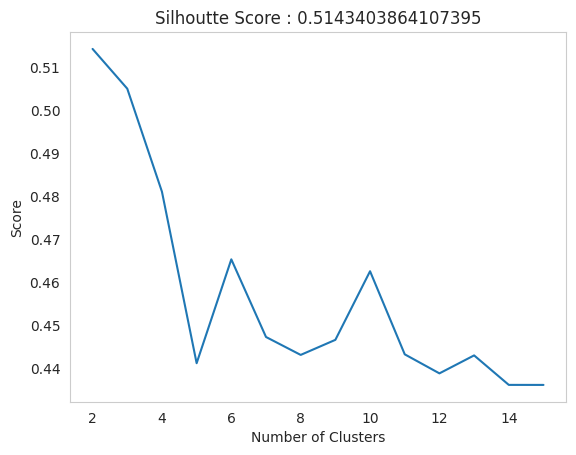

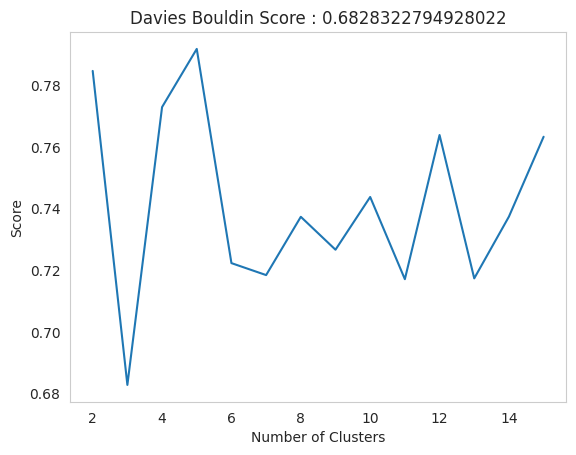

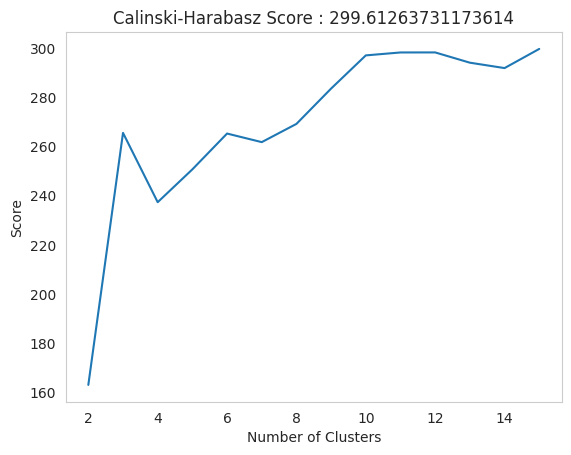

In [ ]:
plot_eval_scores('Silhoutte',dim_red_pca, calculate_silhouette_score, (2, 15), max)
plot_eval_scores('Davies Bouldin', dim_red_pca, calculate_davies_bouldin_index, (2,15), min)
plot_eval_scores('Calinski-Harabasz', dim_red_pca, calculate_calinski_harabasz_index, (2,15), max)

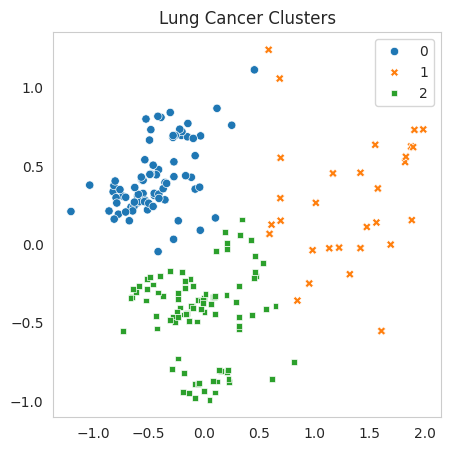

In [ ]:
kmeans = KMeans(n_clusters=3).fit(dim_red_pca)
labels = kmeans.labels_
pca_df['cluster'] = labels
pca_df.index = final_df.index.tolist()
x_axis = np.array(pca_df['PC1'])
y_axis = np.array(pca_df['PC2'])
plot_clusters(pca_df, x_axis, y_axis, pca_df['cluster'], 'Lung Cancer' +" Clusters",'tsne','matrix')

In [ ]:
pca_df.to_csv('/content/New_OLD_Images/lung_pca.csv', index=True)

In [ ]:
cluster_df = final_df.copy()
cluster_df['Clusters'] = pca_df['cluster']

In [ ]:
cluster_df.to_csv('/content/New_OLD_Images/lung_pca_genes.csv', index=True)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=5537d17d07c39cdb4fb32f541c4d2e0bd1e8c2b25f16742af8b1df382f5c7eec
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import umap

# Assuming final_df is your input DataFrame
umap_model = umap.UMAP(n_components=2)
dim_red_umap = umap_model.fit_transform(final_df)

# Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(dim_red_umap, columns=['UMAP1', 'UMAP2'])
len(umap_df)


137

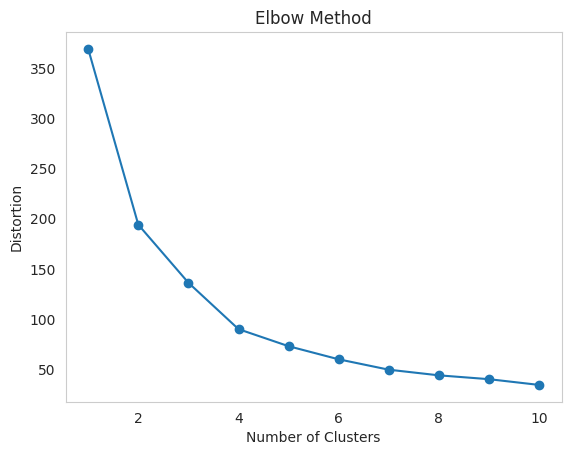

In [ ]:
# Elbow method
def plot_elbow_method(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_elbow_method(dim_red_umap)

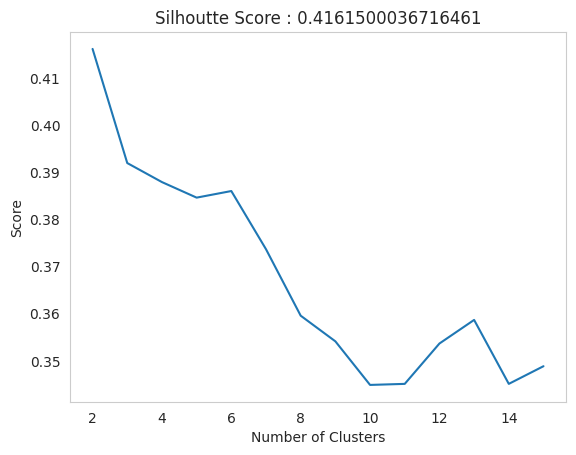

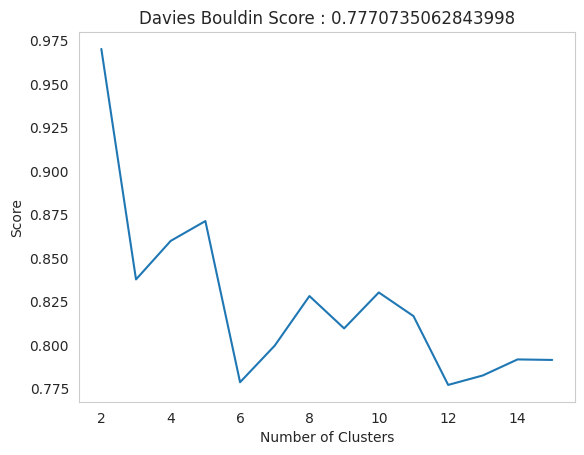

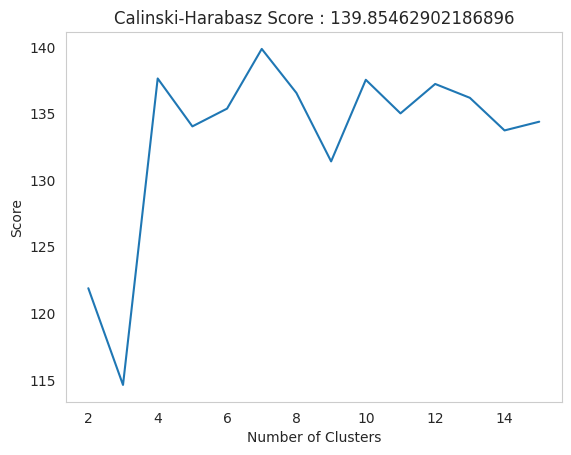

In [ ]:
plot_eval_scores('Silhoutte',dim_red_umap, calculate_silhouette_score, (2, 15), max)
plot_eval_scores('Davies Bouldin', dim_red_umap, calculate_davies_bouldin_index, (2,15), min)
plot_eval_scores('Calinski-Harabasz', dim_red_umap, calculate_calinski_harabasz_index, (2,15), max)

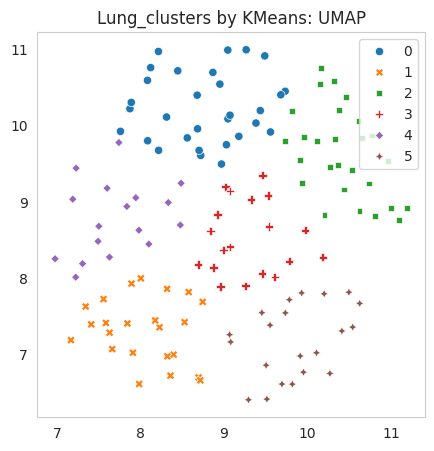

In [ ]:
kmeans = KMeans(n_clusters=6).fit(dim_red_umap)
labels = kmeans.labels_
pca_df['cluster'] = labels
pca_df.index = final_df.index.tolist()
x_axis = np.array(umap_df['UMAP1'])
y_axis = np.array(umap_df['UMAP2'])
plot_clusters(pca_df, x_axis, y_axis, pca_df['cluster'], 'Lung' +"_clusters by KMeans: UMAP",'tsne','matrix')

In [ ]:
final_df

,ALK,APC,ARID1B,ATM,BCR,BRAF,BRCA2,CDH1,CDH11,CIC,...,KLF5,SMAD4,ARAF,CTNNB1,NFE2L2,PPM1D,RASA1,ARHGAP35,FBXW7,NRAS
ULCD-F2-CE-S41,18,7,1,8,8,2,11,1,4,3,...,0,0,0,0,0,0,0,0,0,0
VBVD-F2-CE-S54-L003,15,7,1,2,6,1,5,2,4,0,...,0,0,0,0,0,0,0,0,0,0
VC5H-F2-ce-S28,16,13,4,19,15,5,8,5,6,1,...,0,0,0,0,0,0,0,0,0,0
VCUA-F2-CE-S45,16,0,1,2,7,4,10,1,5,0,...,1,1,0,0,0,0,0,0,0,0
VD1G-F-R1-CE-S19,24,7,2,4,10,2,9,1,5,5,...,0,0,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALG-F-D-CE-S41-L003,20,8,2,3,11,0,12,2,4,1,...,0,0,0,0,0,0,1,0,0,0
WAPA-F-D-CE-S4,21,0,3,3,9,0,7,2,5,0,...,0,0,0,0,0,0,0,0,0,0
WAPE-F-D-CE-S13,19,8,2,4,10,3,4,1,4,0,...,0,0,0,0,0,0,0,0,0,0
WAPM-F-D-CE-S10,15,9,2,6,5,1,5,2,5,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Import necessary libraries
from sklearn.cluster import Birch


In [ ]:
# Initialize BIRCH clustering algorithm
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3)

# Fit the model to the data
birch.fit(final_df)


Birch()

In [ ]:
# Predict cluster labels
cluster_labels = birch.predict(final_df)


In [ ]:
cluster_labels

array([0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])